In [9]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics


housedata = pd.read_csv("train (1).csv")

In [10]:
housedata.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

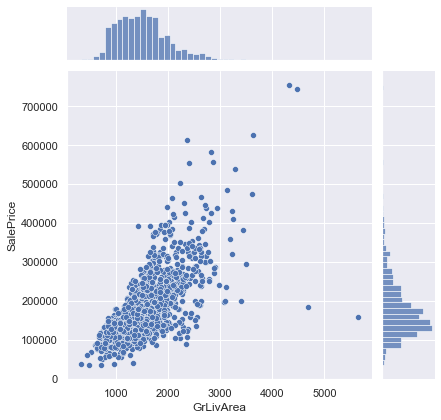

In [31]:
sb.jointplot(data = housedata, x = "GrLivArea",y = "SalePrice")

In [12]:
sp = pd.DataFrame(housedata['SalePrice'])

In [13]:
gla = pd.DataFrame(housedata['GrLivArea'])

In [14]:
tgt = pd.concat((sp,gla),axis = 1)

<AxesSubplot:>

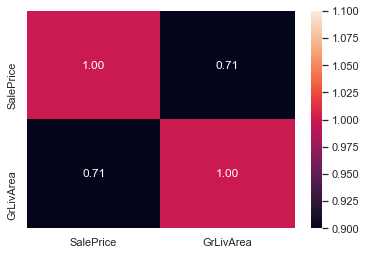

In [15]:
sb.heatmap(tgt.corr(),vmin = 1, vmax = 1, annot = True, fmt = ".2f")
# 

In [16]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [17]:

sp_train = pd.DataFrame(sp[:1100])
sp_test = pd.DataFrame(sp[-360:])

gla_train = pd.DataFrame(gla[:1100])
gla_test = pd.DataFrame(gla[-360:])

In [18]:
linreg.fit(gla_train,sp_train)

LinearRegression()

In [19]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


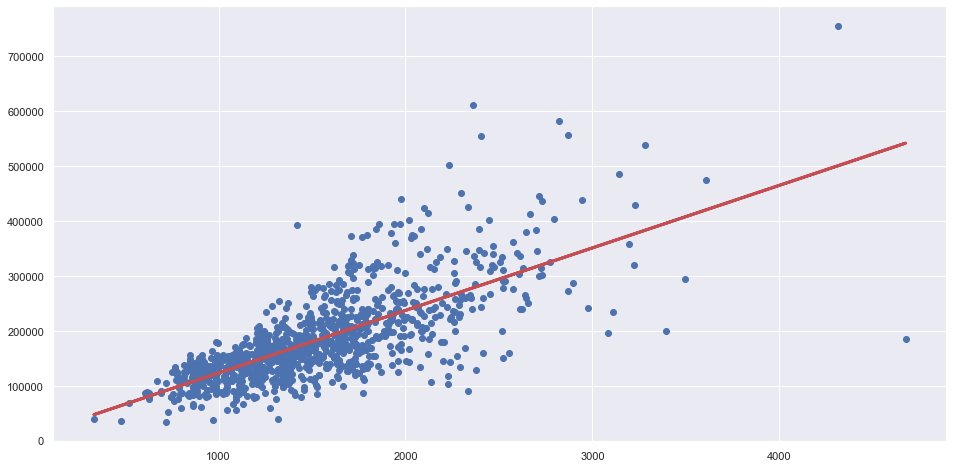

In [20]:
# Formula for the Regression line
regline_x = gla_train
regline_y = linreg.intercept_ + linreg.coef_ * gla_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(gla_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

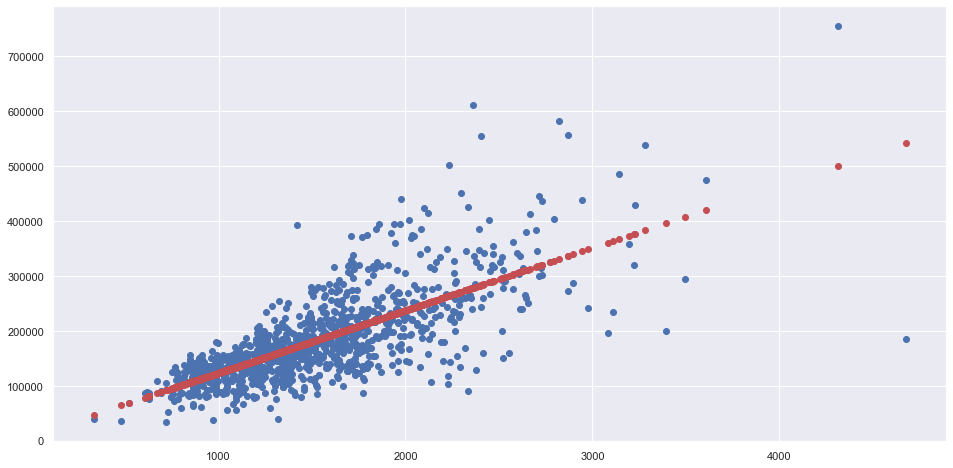

In [21]:
sp_train_pred = linreg.predict(gla_train)

f = plt.figure(figsize=(16, 8))
plt.scatter(gla_train, sp_train)
plt.scatter(gla_train, sp_train_pred, color = "r")
plt.show()

In [22]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gla_train, sp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sp_train, sp_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771


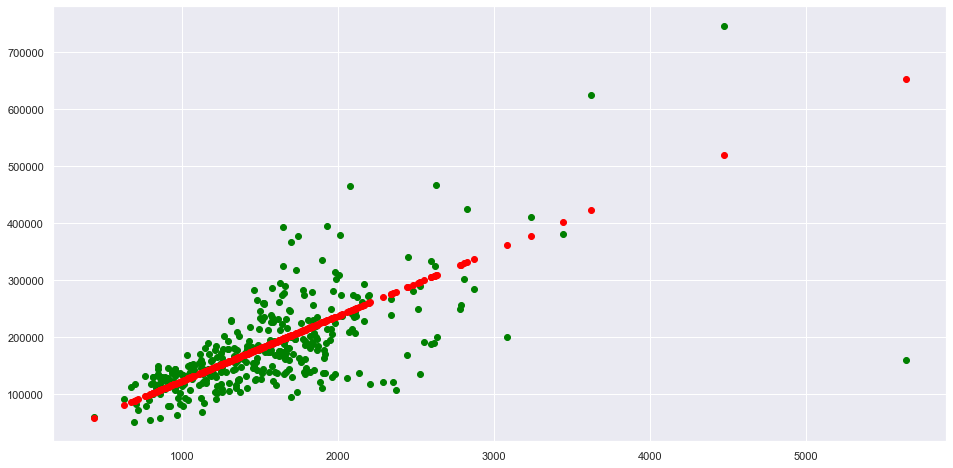

In [23]:
# Test linear regression model using the test set
sp_test_pred = linreg.predict(gla_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(gla_test, sp_test, color = "green")
plt.scatter(gla_test, sp_test_pred, color = "red")
plt.show()

In [24]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(gla_test, sp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(sp_test, sp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.40117720006925806
Mean Squared Error (MSE) 	: 3737081522.296089
Root Mean Squared Error (RMSE) 	: 61131.67364219705


In [25]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

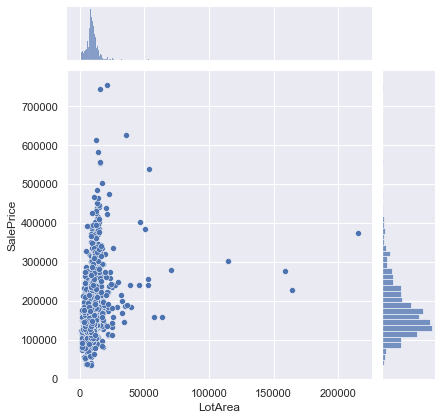

Intercept 	: b =  [160963.95370929]
Coefficients 	: a =  [[1.91881242]]


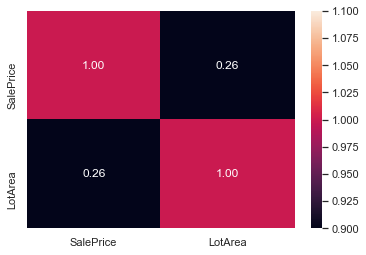

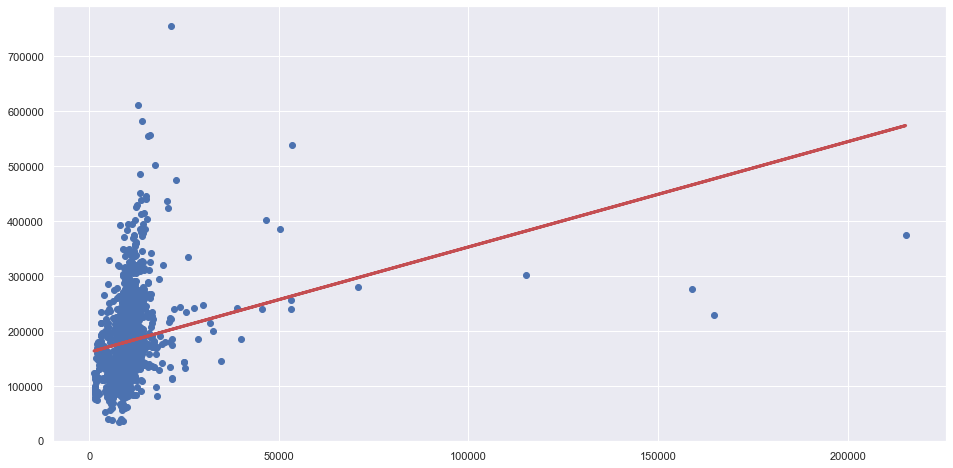

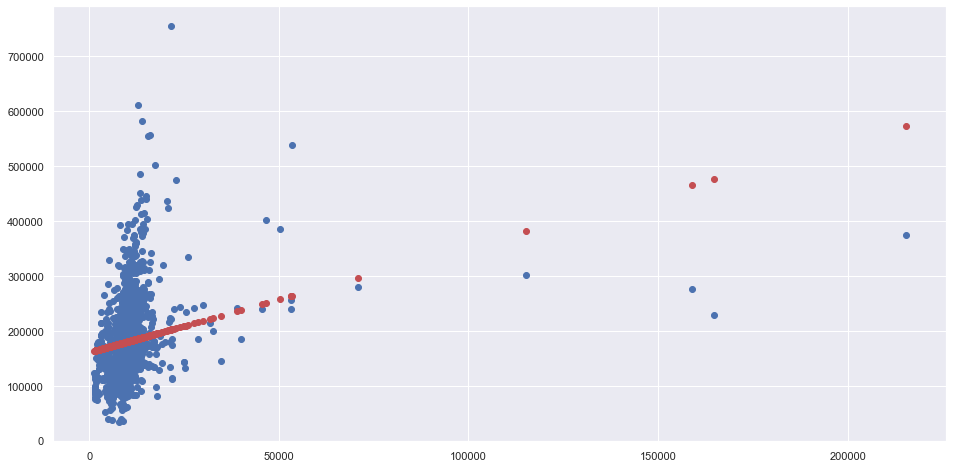

For LotArea:
Explained Variance (R^2) 	: 0.06996047063721678
Mean Squared Error (MSE) 	: 5885258821.936573
Root Mean Squared Error (RMSE) 	: 76715.44057056945


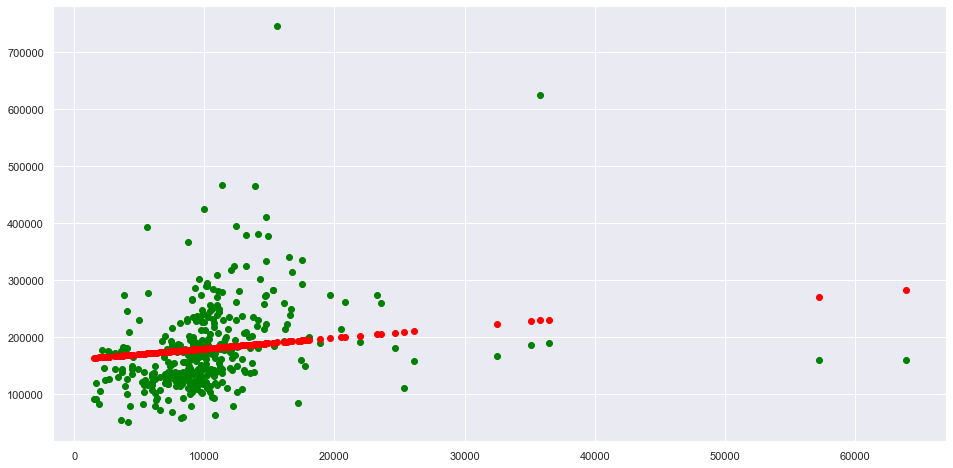

For LotArea
Explained Variance (R^2) 	: 0.0661786844889618
Mean Squared Error (MSE) 	: 5827711275.733227
Root Mean Squared Error (RMSE) 	: 76339.44770387867


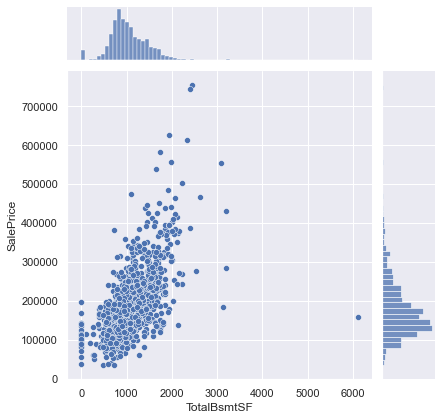

Intercept 	: b =  [54361.70161283]
Coefficients 	: a =  [[120.19979559]]


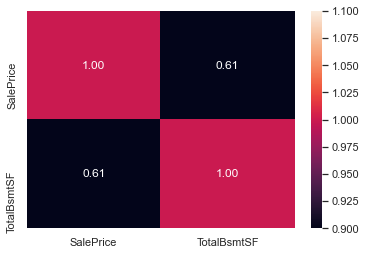

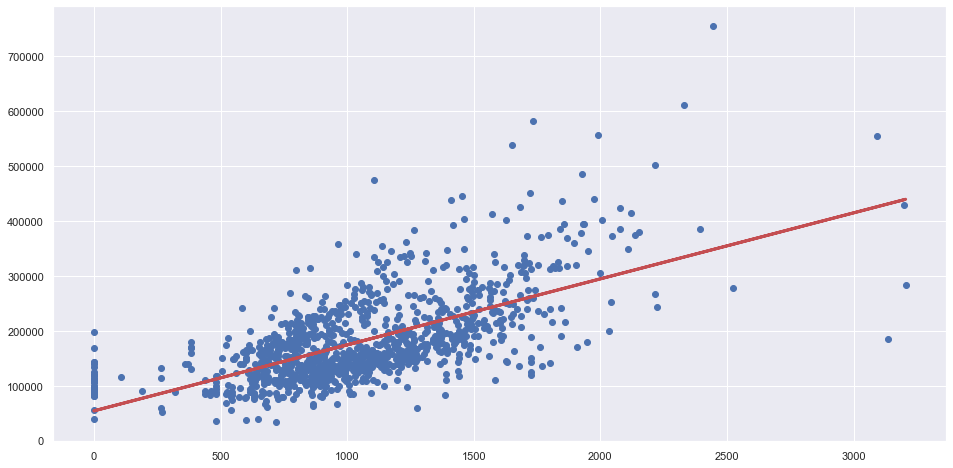

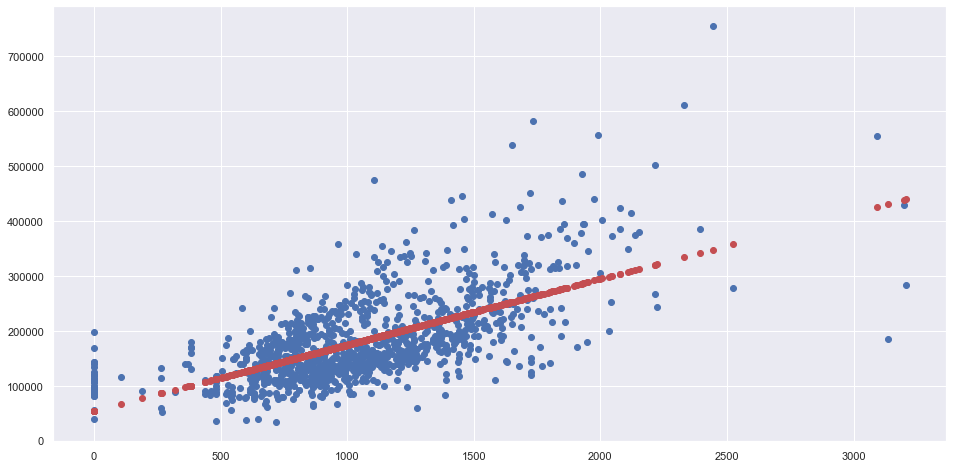

For TotalBsmtSF:
Explained Variance (R^2) 	: 0.4096515413342241
Mean Squared Error (MSE) 	: 3735705165.951247
Root Mean Squared Error (RMSE) 	: 61120.41529596512


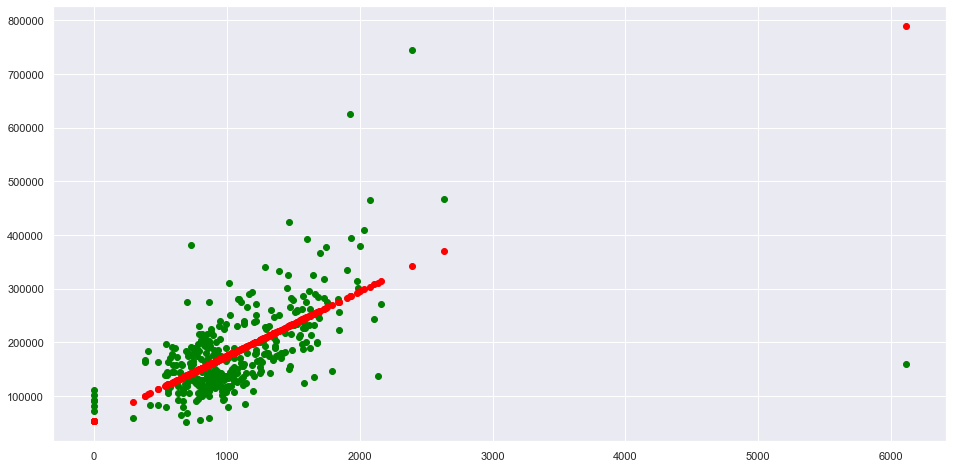

For TotalBsmtSF
Explained Variance (R^2) 	: 0.26305378699344206
Mean Squared Error (MSE) 	: 4599070168.790179
Root Mean Squared Error (RMSE) 	: 67816.44467819128


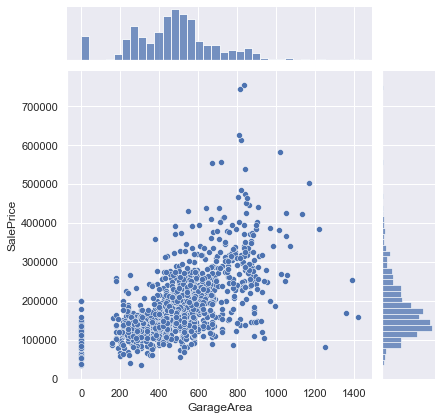

Intercept 	: b =  [67131.98072434]
Coefficients 	: a =  [[241.42776434]]


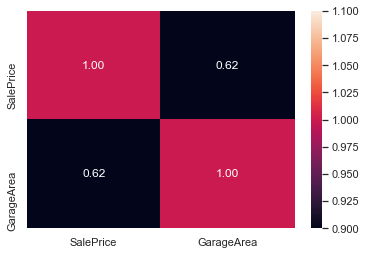

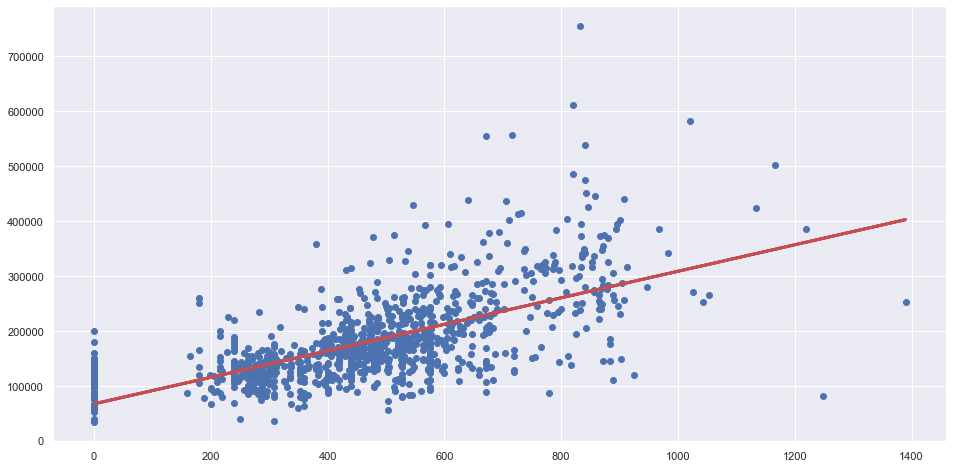

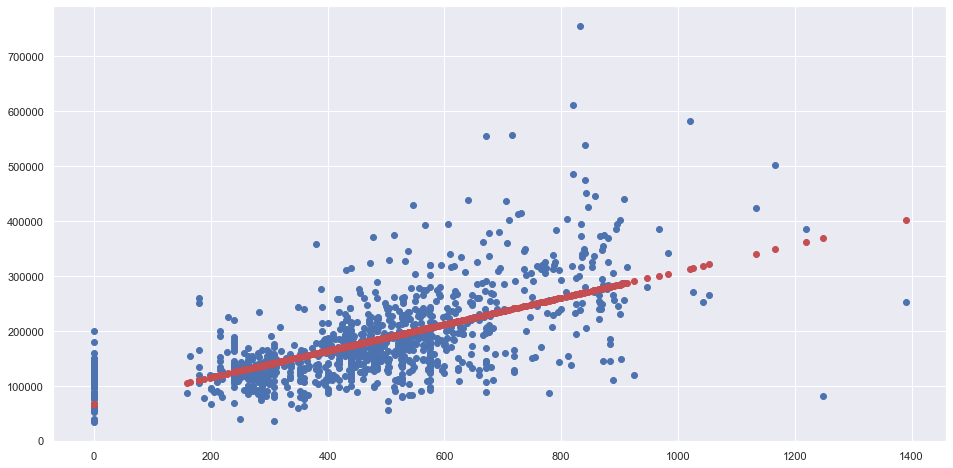

For GarageArea:
Explained Variance (R^2) 	: 0.4052658994757936
Mean Squared Error (MSE) 	: 3763457359.9411807
Root Mean Squared Error (RMSE) 	: 61347.02405122176


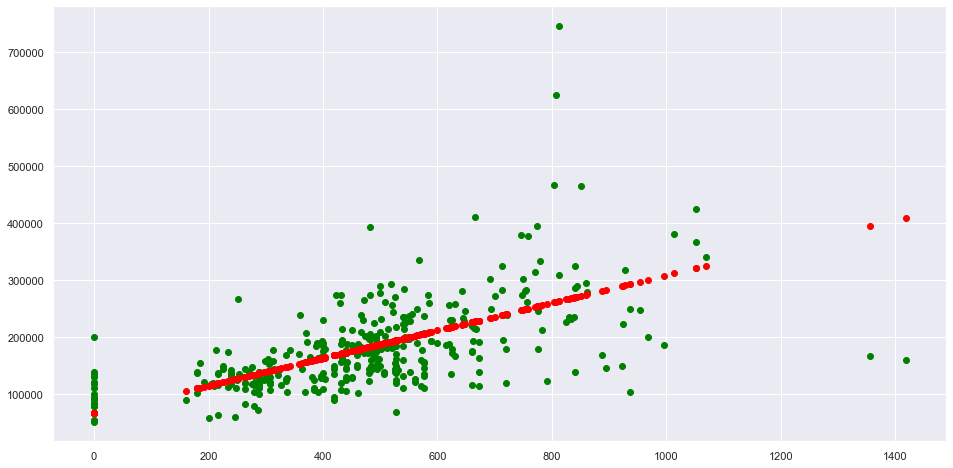

For GarageArea
Explained Variance (R^2) 	: 0.33415894889143827
Mean Squared Error (MSE) 	: 4155323226.122655
Root Mean Squared Error (RMSE) 	: 64461.796640511464


In [61]:
ls = ['LotArea', 'TotalBsmtSF', 'GarageArea']
# f, axes = plt.subplots(2, 3, figsize=(24, 12))

for i,var in enumerate(ls):
    
    
    sb.jointplot(data = housedata, x = var,y = "SalePrice")
    plt.show()
    sp = pd.DataFrame(housedata['SalePrice'])
    x = pd.DataFrame(housedata[var])
    tgt = pd.concat((sp,x),axis = 1)
    sb.heatmap(tgt.corr(),vmin = 1, vmax = 1, annot = True, fmt = ".2f")
    
    var_train = pd.DataFrame(x[:1100])
    var_test = pd.DataFrame(x[-360:])
    
    linreg.fit(var_train,sp_train)
    # Coefficients of the Linear Regression line
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    
    # Formula for the Regression line
    regline_x = var_train
    regline_y = linreg.intercept_ + linreg.coef_ * var_train

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(var_train, sp_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
#     plt.xlabel()
#     plt.ylabel()
    plt.show()
    
    sp_train_pred = linreg.predict(var_train)

    f = plt.figure(figsize=(16, 8))
    plt.scatter(var_train, sp_train)
    plt.scatter(var_train, sp_train_pred, color = "r")
    plt.show()
    
    # Explained Variance (R^2)
    print("For {}:".format(var))
    print("Explained Variance (R^2) \t:", linreg.score(var_train, sp_train))

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        '''Returns the Mean Squared Error of actual and predicted values'''
        return np.mean(np.square(np.array(actual) - np.array(predicted)))


    mse = mean_sq_err(sp_train, sp_train_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    # Test linear regression model using the test set
    sp_test_pred = linreg.predict(var_test)

    # Plot the Predictions
    f = plt.figure(figsize=(16, 8))
    plt.scatter(var_test, sp_test, color = "green")
    plt.scatter(var_test, sp_test_pred, color = "red")
    plt.show()
    
    # Explained Variance (R^2)
    print("For {}:".format(var))
    print("Explained Variance (R^2) \t:", linreg.score(var_test, sp_test))

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        '''Returns the Mean Squared Error of actual and predicted values'''
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(sp_test, sp_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    

In [ ]:
In order to decide on the best model to predict "SalePrice" in this case, we can use the values of Explained Variance(R^2), for which a higher value will indicate a better model,
and Root Mean Squared Error(MSE), for which a smaller value will indicate a better model. 

As such, if we rank the models in terms of descending R^2: GrLivArea (0.40)> GarageArea(0.33)
> TotalBsmtSF(0.26)>LotArea(0.066)

In terms of ascending MSE: GrLivArea(61131)< GarageArea(64461) < TotalBsmtSF(67816) < LotArea(76339).

As such, we can see that the model with GrLivArea is the best and most reliable.
